In [1]:
import torch

<h1> 1. Working with tensors </h1>

In [2]:
z = torch.zeros(5,3)
print(z)
print(type(z))
print(z.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
<class 'torch.Tensor'>
torch.float32


In [3]:
z = torch.ones(5, 3, dtype=torch.int32)
print(z)
print(z.dtype)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int32)
torch.int32


In [4]:
#Generating random numbers through torch.rand with and without manual seeding
torch.manual_seed(42)
z = torch.rand(2,2)
print(z)

z = torch.rand(2,2)
print(z)

torch.manual_seed(42)
z = torch.rand(2,2)
print(z)

tensor([[0.8823, 0.9150],
        [0.3829, 0.9593]])
tensor([[0.3904, 0.6009],
        [0.2566, 0.7936]])
tensor([[0.8823, 0.9150],
        [0.3829, 0.9593]])


In [5]:
#Arithmetic operations with tensors
x = torch.rand(2,2)
print(x)
y = torch.rand(2,2)
print(y)
z = x+y
print(z)
z = z-0.5
print(z)

tensor([[0.3904, 0.6009],
        [0.2566, 0.7936]])
tensor([[0.9408, 0.1332],
        [0.9346, 0.5936]])
tensor([[1.3312, 0.7341],
        [1.1912, 1.3872]])
tensor([[0.8312, 0.2341],
        [0.6912, 0.8872]])


<h1> 2. Building a basic pytorch model </h2>

In [2]:
import torch                      #for all things pytorch
import torch.nn as nn             #for torch.nn.Module, the parent object for pytorch models
import torch.nn.functional as F   #for the activation function

In [7]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1,6,3)
        self.conv2 = nn.Conv2d(6,16,3)
        self.fc1 = nn.Linear(16*6*6, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *=s
        return num_features

In [8]:
net = LeNet()
print(net)

ip = torch.rand(1,1,32,32) #Here the first din
print('\nImage batch shape:')
print(ip.shape)

output = net(ip) #we don't call forward directly
print('\nRaw output')
print(output)
print(output.shape)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Image batch shape:
torch.Size([1, 1, 32, 32])

Raw output
tensor([[ 0.0838, -0.0530,  0.0239, -0.0255, -0.0213, -0.1650, -0.1113,  0.0333,
         -0.0727, -0.0217]], grad_fn=<AddmmBackward0>)
torch.Size([1, 10])


<h1> Building and Training a model </h1>

In [1]:
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Creating a composite transform
transform = transforms.Compose([
    transforms.ToTensor(), #converts the loaded images to pytorch tensors
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)) #adjusts the values of tensors so that their average is zero and std_dev 0.5
])

In [3]:
#Downloading the data and creating a dataloader
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./testdata', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=True, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


horse   car truck  deer


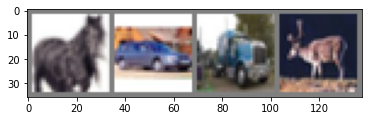

In [4]:
def imshow(img):
    img = img/2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))

dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s'%classes[labels[j]] for j in range(4)))

  car   car   cat  deer


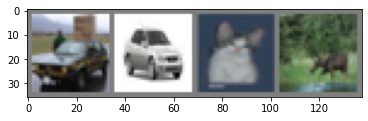

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img/2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))

dataiter = iter(testloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s'%classes[labels[j]] for j in range(4)))

In [15]:
#Creating out Net
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

device = ('mps' if torch.backends.mps.is_available else 'cpu')
print(device)
net = Net()

mps


In [17]:
#Creating a loss criterion and an optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [18]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        #Print statistics
        running_loss += loss.item()
        if (i%1000==0):
            print(f"Epochs: {epoch+1}/2, Iterations: {i+1}, Loss: {running_loss/1000}")
            running_loss = 0.0
print("Finished Training!")

AttributeError: 'list' object has no attribute 'to'

In [11]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted==labels).sum().item()

print(f"Total accuracy of the model: {((correct*100)/total):.4f}")

Total accuracy of the model: 60.2800


<h1> Deployment with torchscript </h1>